In [1]:
import requests
import json
import time
import itertools
import wget
import os
import pickle
import numpy as np

import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import precision_recall_curve
import scipy

sns.set_style('white')
import tensorflow as tf
import pandas as pd
import keras
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.initializers as init
from keras import backend as K
from keras.models import load_model

Using TensorFlow backend.


In [2]:
tf.__version__

'1.0.1'

In [3]:
x_train_dict = pickle.load(open('training_num.pik' , 'rb'))

In [4]:
x_train_raw = x_train_dict['images'][:9988]

x_train = np.array(x_train_raw)

print x_train.shape

(9988, 128, 85, 3)


In [5]:
img_rows = x_train.shape[1]

img_cols = x_train.shape[2]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
    
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)


In [6]:
x_train = x_train.astype('float32')

x_train /= 255

print 'x_train shape:', x_train.shape
print  x_train.shape[0], 'train samples'

x_train shape: (9988, 128, 85, 3)
9988 train samples


In [7]:
y_raw = pd.read_csv('Genres_labels_All_cleaned.csv')

y_raw_sel = y_raw.iloc[:, 1:-1].values

num_classes = y_raw_sel.shape[1]

In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_raw_sel, num_classes)

In [17]:
# create an empty network model
model = Sequential()

# --- input layer ---
model.add(Conv2D(16, kernel_size=(7, 7), activation='relu', input_shape=input_shape , 
                 kernel_initializer = init.he_normal(109)))

# --- max pool ---
model.add(MaxPooling2D(pool_size=(2, 2)))


# ---- Conv Layer ---
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', 
                 kernel_initializer = init.he_normal(109)))

# --- max pool ---
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- Conv layer ---
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                kernel_initializer = init.he_normal(109)))

# --- max pool ---
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- Conv layer ---
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu' ,
                kernel_initializer = init.he_normal(109)))

# --- max pool ---
model.add(MaxPooling2D(pool_size=(2, 2)))


# flatten for fully connected classification layer
model.add(Flatten())

# --- fully connected layer ---
model.add(Dense(128, activation='relu',
               kernel_initializer = init.he_normal(109)))

# --- fully connected layer ---
model.add(Dense(64, activation='relu' ,
               kernel_initializer = init.he_normal(109)))

# --- classification ---
model.add(Dense(num_classes, activation='sigmoid'))

# prints out a summary of the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 122, 79, 16)       2368      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 39, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 57, 35, 16)        6416      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 17, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 15, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 7, 32)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 5, 32)         9248      
__________

In [18]:
sgd = SGD(lr=1e-6, momentum=0.99)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [19]:
# Batch Size
batch_size = 64

# epochs
epochs = 30

In [20]:
history = model.fit(x_train, y_raw_sel,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3)

# once training is complete, let's see how well we have done
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

Train on 6991 samples, validate on 2997 samples
Epoch 1/30
6991/6991 [==============================] - 5s - loss: 5.9271 - acc: 0.1459 - val_loss: 5.7476 - val_acc: 0.1632

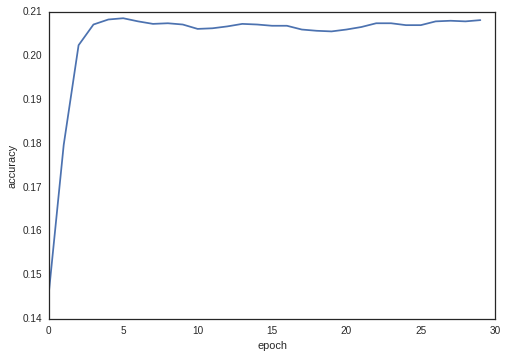

In [21]:
plt.plot(history.history['acc'])
plt.xlabel("epoch")
plt.ylabel("accuracy")

In [22]:

model.save('arch1_var1.h5')

Train on 6991 samples, validate on 2997 samples
Epoch 1/30
6991/6991 [==============================] - 5s - loss: 5.5537 - acc: 0.2055 - val_loss: 5.4264 - val_acc: 0.2049